In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
collected_data = pd.read_csv('data/collected_data.csv') # Read the CSV file
data = collected_data.copy()
# Setting column 'date' as index.
data = data.set_index('date', drop=True)
del collected_data
# data.drop(['sp500'], axis=1, inplace=True)

data

,sahm,indpro,sp500,tr10,t10yff,unrate,pcepi,payems,fedfunds,recession
date,,,,,,,,,,
1962-02-01,-0.17,0.016229,0.016139,-0.043737,1.650556,0.055,0.042,0.827913,0.0237,0
1962-03-01,-0.17,0.005350,-0.005878,-0.108990,1.078182,0.056,0.021,0.819544,0.0285,0
1962-04-01,-0.10,0.002130,-0.063973,-0.087455,1.043000,0.056,0.018,0.829109,0.0278,0
1962-05-01,-0.07,-0.001066,-0.089914,0.030636,1.441818,0.055,0.010,0.817113,0.0236,0
1962-06-01,0.00,-0.002132,-0.085381,0.035411,1.206667,0.055,0.010,0.816714,0.0268,0
...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0.37,-0.000690,-0.042506,0.330591,-0.790909,0.039,0.322,0.820381,0.0533,0
2024-05-01,0.37,0.007466,0.046904,-0.056818,-0.847727,0.040,-0.010,0.824685,0.0533,0
2024-06-01,0.43,0.000622,0.034082,-0.177010,-1.024737,0.041,0.145,0.820780,0.0533,0


In [3]:
# get X and y 
X = data.drop(['recession'], axis=1)
y = data['recession']

# We define the training period.
X_train, y_train = X.loc["1962-02-01":"2012-12-01"], y.loc["1962-02-01":"2012-12-01"]
# We define the test period.
# X_test, y_test = X.loc["2013-01-01":], y.loc["2013-01-01":]
# y_train.describe()

### 1. Metrics

Here are the main metrics we can use to get the **final score** for each **model**:

1. **Precision**: It measures the proportion of true positive predictions relative to all positive predictions. It is **important** when you **want to minimize false positives**.<br>Precision = TP/(TP+FP)
   
2. **Recall** (Sensitivity): It measures the proportion of true positive predictions to all actual positive cases. It is useful when you want to minimize false negatives.<br>Recall = TP/(TP+FN)
   
3. **F1-score**: Is a metric that balances precision and recall. It is calculated as the harmonic mean of precision and recall. F1 Score is useful when seeking a balance between high precision and high recall, as it penalizes extreme negative values of either component.<br>F1 = 2\*Precision\*Recall/(Precision+Recall)
   
4. **Confusion Matrix**: Visualizes true and predicted classes, which can help better understand model performance.
    
5. **Specificity**: It measures the proportion of true negative predictions relative to all actual negative cases. It is useful when you want to **minimize false positives**.<br>Specificity = TN/(TN+FP)
    
6. **Accuracy**: It measures the proportion of correctly predicted cases (both positive and negative) relative to the total number of cases. Accuracy **can be misleading with unbalanced data**, as it can be high even if the model does not predict the small class well.

### 2. Logistic Regression

When properly configured with the **class_weight='balanced'** option, Logistic Regression can handle unbalanced data. However, if the classes are very imbalanced, the model may be biased towards the majority class. It works well for moderate imbalance, but **may need additional techniques to deal with a large imbalance**.

Разпределение на класовете в y_train: [528  83]
Започва търсене на оптимални параметри...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Най-добри параметри: {'C': 0.001, 'class_weight': {0: 1, 1: 6}, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Най-добър Precision score: 0.7050505050505051

Оценка на най-добрия модел с cross-validation:
Precision: 0.7000
Recall: 0.8434
F1-Score: 0.7650
Accuracy: 0.9296
Матрица на обърквания:
[[498  30]
 [ 13  70]]
Specificity: 0.9432


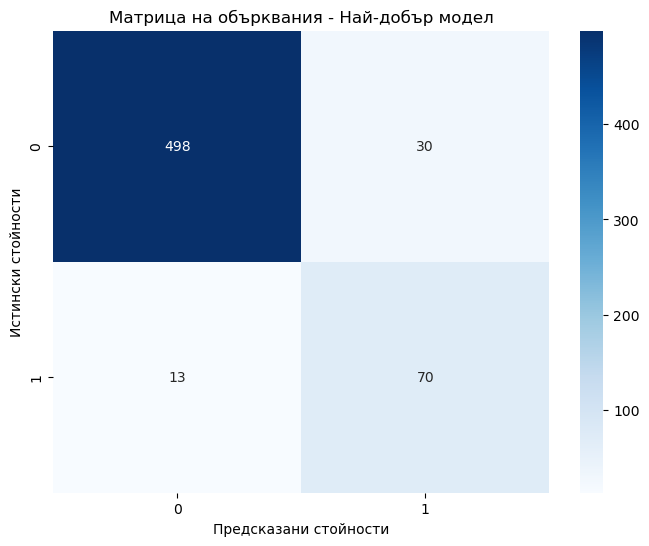


Експериментиране с различни прагове за решение:


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


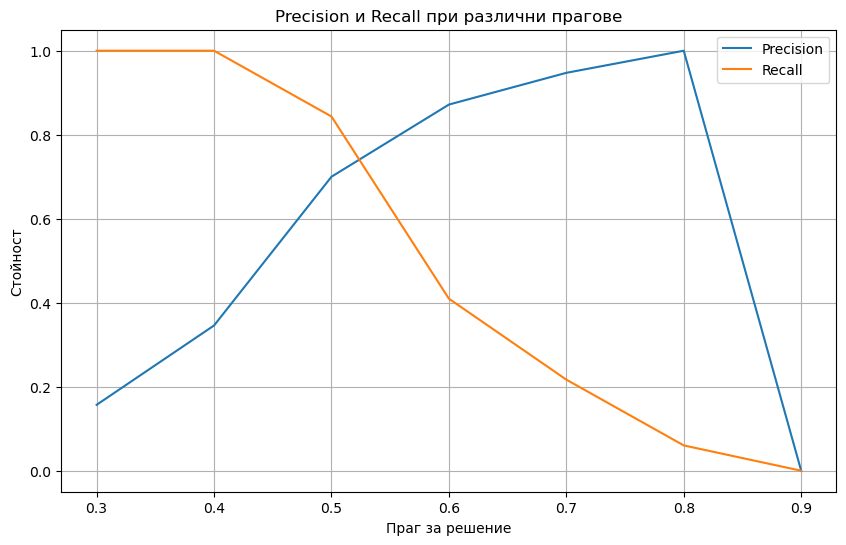


Най-добър праг за precision: 0.8

Финални резултати с оптимизиран праг:
Precision: 1.0000
Recall: 0.0602
F1-Score: 0.1136
Accuracy: 0.8723
Матрица на обърквания:
[[528   0]
 [ 78   5]]
Specificity: 1.0000


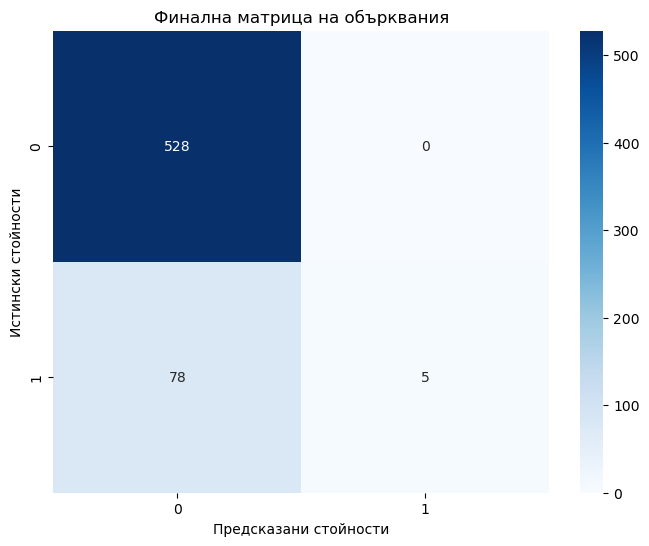


Моделът и скалера са запазени във файловете 'best_precision_model.joblib' и 'scaler.joblib'


In [7]:
# Първо да видим разпределението на класовете
print("Разпределение на класовете в y_train:", np.bincount(y_train))

# Стандартизация на входните данни
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Дефиниране на функция за визуализация на резултатите
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Истински стойности')
    plt.xlabel('Предсказани стойности')
    plt.show()

# Създаване на базов модел и оценка
def evaluate_model(y_true, y_pred, title="Матрица на обърквания"):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Матрица на обърквания:")
    print(conf_matrix)
    
    # Изчисляване на специфичност
    TN, FP, FN, TP = conf_matrix.ravel()
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity:.4f}")
    
    plot_confusion_matrix(conf_matrix, title)
    return precision, recall, f1, accuracy

# Настройка на параметрите с GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', {0:1, 1:6}, {0:1, 1:8}, {0:1, 1:10}],
    'solver': ['liblinear', 'saga'],  # liblinear е добър за малки датасети
    'max_iter': [1000],
    'penalty': ['l1', 'l2']  # добавяме различни видове регуляризация
}

# Създаване на базов модел
base_model = LogisticRegression(random_state=42)

# Настройка на GridSearchCV с фокус върху precision
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=skf,
    scoring='precision',  # Фокусираме се върху precision
    n_jobs=-1,
    verbose=1
)

# Изпълнение на търсенето
print("Започва търсене на оптимални параметри...")
grid_search.fit(X_train_scaled, y_train)

# Извеждане на резултатите
print("\nНай-добри параметри:", grid_search.best_params_)
print("Най-добър Precision score:", grid_search.best_score_)

# Използване на най-добрия модел
best_model = grid_search.best_estimator_

# Оценка на модела с cross-validation
print("\nОценка на най-добрия модел с cross-validation:")
y_pred = cross_val_predict(best_model, X_train_scaled, y_train, cv=skf)
precision, recall, f1, accuracy = evaluate_model(y_train, y_pred, "Матрица на обърквания - Най-добър модел")

# Експериментиране с различни прагове за решение
print("\nЕкспериментиране с различни прагове за решение:")
y_pred_proba = cross_val_predict(best_model, X_train_scaled, y_train, cv=skf, method='predict_proba')

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba[:, 1] >= threshold).astype(int)
    precision = precision_score(y_train, y_pred_threshold)
    recall = recall_score(y_train, y_pred_threshold)
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall
    })

# Визуализация на резултатите от праговете
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.xlabel('Праг за решение')
plt.ylabel('Стойност')
plt.title('Precision и Recall при различни прагове')
plt.legend()
plt.grid(True)
plt.show()

# Намиране на най-добрия праг за precision
best_precision_threshold = results_df.loc[results_df['precision'].idxmax(), 'threshold']
print(f"\nНай-добър праг за precision: {best_precision_threshold}")

# Финални предсказания с най-добрия праг
final_predictions = (y_pred_proba[:, 1] >= best_precision_threshold).astype(int)
print("\nФинални резултати с оптимизиран праг:")
evaluate_model(y_train, final_predictions, "Финална матрица на обърквания")

# Запазване на най-добрия модел
import joblib
joblib.dump(best_model, 'best_precision_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\nМоделът и скалера са запазени във файловете 'best_precision_model.joblib' и 'scaler.joblib'")

### 3. Decision Tree

Decision Trees can handle unbalanced data, but without regularization they tend to be biased towards the majority class if the classes are highly imbalanced. **Not the best choice for a large imbalance if no balancing techniques are used.**

### 4. Random Forest

Random Forest is more robust to unbalanced classes, especially when used with the **class_weight='balanced_subsample'** option, which compensates for the imbalance. This makes it more stable compared to Decision Tree. **Very suitable for unbalanced data if properly set up.**

### 5. XGBoost

XGBoost has the **scale_pos_weight** parameter which can correct the imbalance between classes. This makes it one of the best models for unbalanced data. One of the most suitable models **to deal with severe imbalance**.

### 6. CatBoost

CatBoost also supports imbalance correction parameters (**class_weights**) and can automatically detect imbalance in data. Good **for dealing with unbalanced classes**.

### 7. SVM

SVM can handle unbalanced classes by using the **class_weight='balanced'** parameter. However, with highly unbalanced data, SVM may not be the best solution. It works well with moderate imbalance, but **may struggle with more imbalance**.